In [1]:
import numpy as np
from numpy import pi, sqrt, exp, arcsin, arctan, arccos
import numpy.ma as ma
from scipy import stats

import matplotlib as mpl

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

# mpl.use('pgf')
FIGURE_PATH='figures/'

import matplotlib
import matplotlib.pyplot as plt

from scipy.constants import h, m_e, k, N_A, pi, e, hbar, u, k, mu_0

from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2

π = np.pi

In [2]:
def sf(x):
    # calculate significant figures
    # return: decimal place to be rounded to
    if isinstance(x, float) or isinstance(x,int):
        if x == 0:
            return 20 
        else:
            return int(-1 * np.floor(np.log10(x)) + 1)
    else:
        return (-1 * np.floor(np.log10(np.min(ma.masked_where(x==0,x)))) + 1).astype(int)

In [3]:
def cm2inch(lst):
    inch = 2.54
    return [x/inch for x in lst] 

In [4]:
from matplotlib import rcParams
if matplotlib.get_backend() == 'pgf':
    # rcParams.update({'figure.autolayout': True})
    rcParams.update({'figure.figsize' : cm2inch([12,12*0.6])})
    # rcParams.update({'font.size' : 2})
    rcParams.update({'legend.loc' : 'best'})
    rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
         "\\usepackage{units}",          # load additional packages
         "\\usepackage{metalogo}",
         "\\usepackage{unicode-math}",   # unicode math setup
         r"\setmainfont{DejaVu Serif}",  # serif font via preamble
        ])
    }) 
else:
    rcParams.update({'figure.autolayout': True})
    rcParams.update({'figure.figsize' : [15,9.47]})
    rcParams.update({'font.size' : 16})
    rcParams.update({'legend.loc' : 'best'})

###### Fit function to data
```
def fit_function(x, param1, param2, param3):
    return param1*x**param3 + param2 

popt, pcov = curve_fit(fit_function, x, y, sigma = error_array)

param1 = popt[0]
param1_err = pcov[0][0]

plt.errorbar(x, y, linestyle='none', marker='.', yerr=error_array)
plt.plot(x,fit_function(x, *popt))
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')
plt.xticks(x)
plt.yscale('log') # set y scale to logarithmic
plt.show()
```

###### Load .txt data into arrays
```
data1, data2 = np.loadtxt('data/dataset.txt', skiprows=1, usecols=(0,1), unpack=True)
```

###### Create PGF Images
```
if matplotlib.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+'filename.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+'filename.pdf', format='pdf')
    plt.clf()
```

###### Significant Figures
```
print(f"value: {round(value,sf(value_err)} +/- {round(value_err,sf(value_err)}")
```

#### VI.1 Induktionsgesetz

##### 1.)

I = 4.7 A

R:  147500.0
-0.7846070962711889 0.04843698767285572


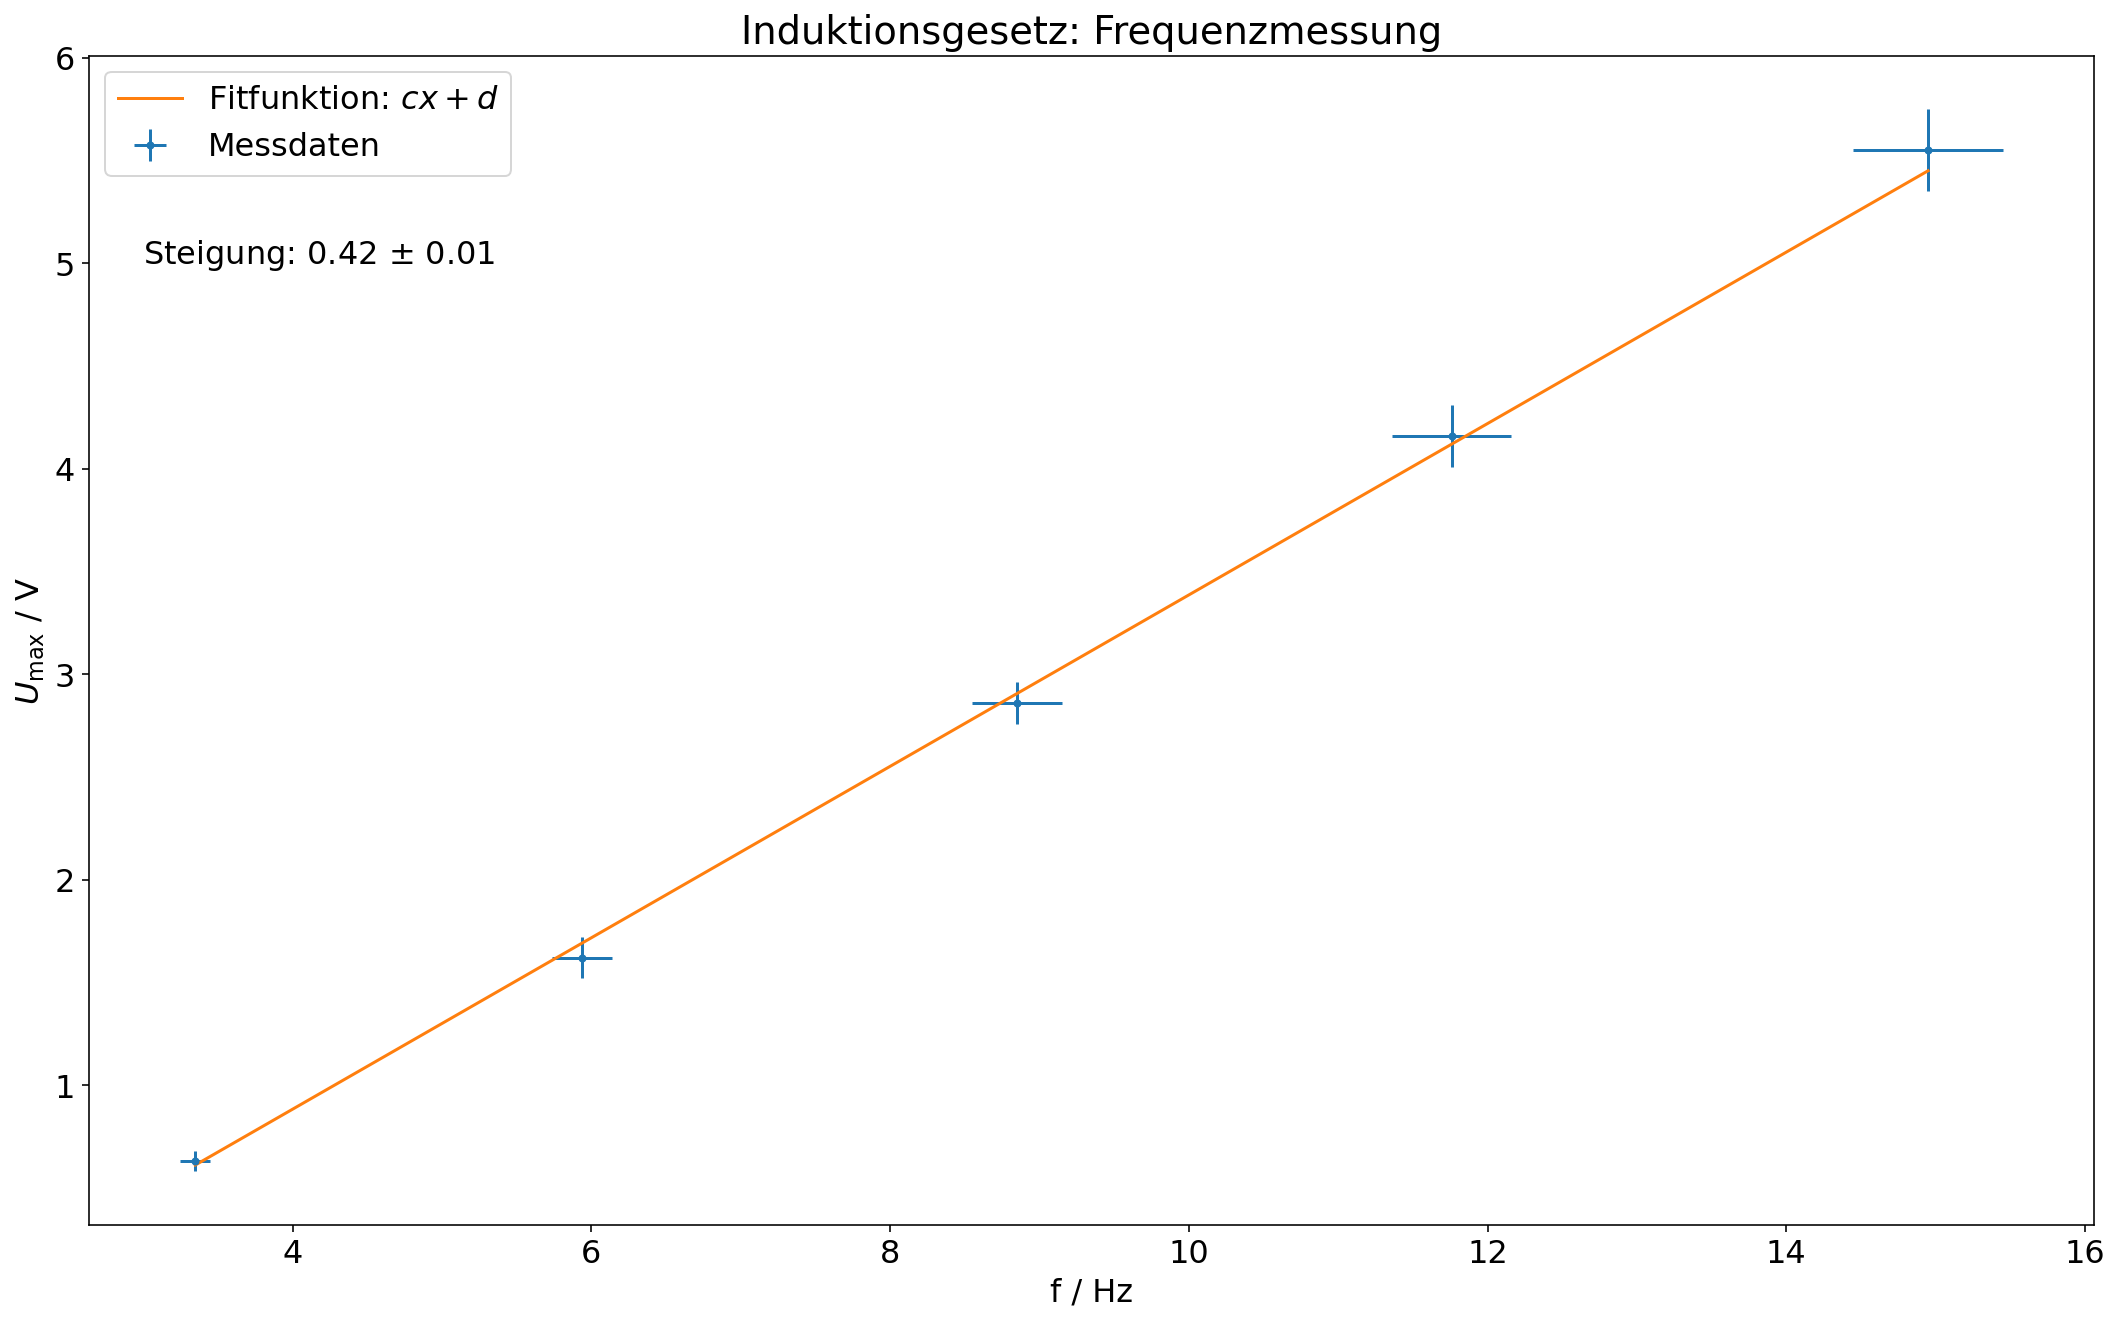

In [5]:
f, Δf, U, ΔU = np.loadtxt('data/aufgabe1_1.txt', skiprows=1, usecols=(0,1,2,3), unpack=True)

Um = 0.5 * U
ΔUm = 0.5 * ΔU
I = 4.7 # A;
A = 41.7E-4 # m^2;
Ns = 4000 # ; Windungen Spule
Nh = 124  # ; Windungen Helmholtz Spule
R = 295/2E-3 # m; Helmholtz Spule Radius
print('R: ', R)
d = 147E-3 # m; Abstand Helmholtz Spulen

def linear(x, gradient, intercept):
    return gradient * x + intercept

Um_err = np.ones(Um.size)*ΔUm
popt, pcov = curve_fit(linear, f, Um, sigma = Um_err )

c1 = popt[0]
print(popt[1], np.sqrt(pcov[1][1]))
c1_err = np.sqrt(pcov[0][0])

plt.errorbar(f,Um, xerr=Δf, yerr=ΔUm, linestyle='none', marker='.', label='Messdaten')
Um = np.linspace(np.min(f),np.max(f))
plt.plot(f,linear(f,*popt),label=r'Fitfunktion: $cx + d$')
plt.xlabel(r'f / Hz')
plt.ylabel(r'$U_{\max}$ / V')
plt.title('Induktionsgesetz: Frequenzmessung')
plt.text(3, 5, f'Steigung: {c1:.2f} $\pm$ {c1_err:.2f}')
plt.legend()
if matplotlib.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+'aufgabe1_1.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+'aufgabe1_1.pdf', format='pdf')
    plt.clf()
plt.savefig(FIGURE_PATH+'aufgabe1_1.jpg', format='jpg')
plt.show()

In [6]:
f, Δf, U, ΔU = np.loadtxt('data/aufgabe1_1.txt', skiprows=1, usecols=(0,1,2,3), unpack=True)

Um = 0.5 * U # V;
ΔUm = 0.5 * ΔU # V;
I = 4.7 # A;
ΔI = 0.1
A = 41.7E-4 # m^2;
Ns = 4000 # ; Windungen Spule
Nh = 124  # ; Windungen Helmholtz Spule
R = (295/2)*1E-3 # m; Helmholtz Spule Radius
d = 147E-3 # m; Abstand Helmholtz Spulen

B_H = (4/5)**(3/2) * mu_0 * I * Nh / R # T; Helmholtz Spule
B_H_err = B_H * ΔI/I 

B = c1 / (2 * π * A * Ns) # T; Messdaten
B_err = B * c1_err / c1

print(f"B: {round(B,sf(B_err)):e} +/- {round(B_err,sf(B_err)):e}")
print(f"B_H: {round(B_H,sf(B_H_err)):e} +/- {round(B_H_err,sf(B_H_err)):e}")
print(abs(B_H-B)/np.sqrt(B_err**2 + B_H_err**2))

B: 3.979000e-03 +/- 7.200000e-05
B_H: 3.553000e-03 +/- 7.600000e-05
4.08447063373507


##### 2.)
f = 9.8 $\pm$ 0.1 Hz

$\Delta$I = 0.05 A

$\Delta$U_m = 0.1 Vss

In [7]:
I, U = np.loadtxt('data/aufgabe1_2.txt', skiprows=1, usecols=(0,1), unpack=True)

Um = 0.5 * U
ΔU = 0.1 # Vss;
ΔUm = 0.5 * ΔU
f = 9.8
Δf = 0.1 # Hz;
ΔI = 0.05 # A;

def linear(x, gradient, intercept):
    return gradient * x + intercept

Um_err = np.ones(Um.size)*ΔUm
popt, pcov = curve_fit(linear, I, Um, sigma = Um_err )

c2 = popt[0]
c2_err = np.sqrt(pcov[0][0])
print('f(0): ', popt[1], np.sqrt(pcov[1][1]))

plt.errorbar(I, Um, xerr=ΔI, yerr=ΔUm, linestyle='none', marker='.', label='Messdaten')
x = np.linspace(np.min(I),np.max(I))
plt.plot(x,linear(x,*popt),label=r'Fitfunktion: $cx+d$')
plt.xlabel(r'I / A')
plt.ylabel(r'$U_{\max}$ / V')
plt.title('Induktionsgesetz: Strommessung')
plt.text(0.25, 3, f'Steigung: {c2:.2f} $\pm$ {c2_err:.2f}')
plt.legend()
if matplotlib.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+'aufgabe1_2.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+'aufgabe1_2.pdf', format='pdf')
    plt.clf()
plt.savefig(FIGURE_PATH+'aufgabe1_2.jpg', format='jpg')
plt.show()

f(0):  0.14679999999813875 0.019777122007492307


#### Aufgabe 2

##### 1.)
$\Delta \alpha$ = $2.5^{\circ}$

$\Delta U_m$ = 0.04 Vss

$\Omega$ = $2\pi\cdot$(103.1 $\pm$ 0.1 Hz)

In [8]:
α, U = np.loadtxt('data/aufgabe2_1.txt', skiprows=1, usecols=(0,1), unpack=True)

Ω = 2*π*103.1 # Hz;
ΔΩ = 2*π*0.1 # Hz;
ΔU = 0.18 # Vss;
Δα = 2.5  # grad;

Um = 0.5 * U
ΔUm = 0.5 * ΔU

def fit_function(x, a, b):
    return a*np.abs(np.cos(π/180*x)) + b

Um_err = np.ones(Um.size)*ΔUm
popt, pcov = curve_fit(fit_function, α, Um, sigma = Um_err )
a = popt[0]
a_err = pcov[0][0]
print(popt[0], np.sqrt(pcov[0][0]))

plt.errorbar(α, Um, xerr=Δα, yerr=ΔUm, linestyle='none', marker='.', label='Messdaten')
x = np.linspace(np.min(α),np.max(α),1000)
plt.plot(x,fit_function(x,*popt),label=r'Fitfunktion: $a*|\cos(\alpha)| + b$')
plt.xlabel(r'$\alpha$ / $^{\circ}$')
plt.ylabel(r'$U_{\max}$ / V')
plt.title('Induktionsspannung: Winkelabhängigkeit')
plt.legend()
if matplotlib.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+'aufgabe2_1.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+'aufgabe2_1.pdf', format='pdf')
    plt.clf()
plt.savefig(FIGURE_PATH+'aufgabe2_1.jpg', format='jpg')
plt.show()

3.357314538198364 0.14239361127759126


In [9]:
α, U = np.loadtxt('data/aufgabe2_1.txt', skiprows=1, usecols=(0,1), unpack=True)

Ω = 2*π*103.1 # Hz;
ΔΩ = 2*π*0.1 # Hz;
ΔU = 0.18 # Vss;
Δα = 2.5  # grad;

Um = 0.5 * U  # V;
ΔUm = 0.5 * ΔU  # V;

B = a * pi / 180 / (A * Ns * Ω)
B_err = B * np.sqrt((a_err/a)**2 + (ΔΩ/Ω)**2)

print(f"B: {round(B,sf(B_err)):e} +/- {round(B_err,sf(B_err)):e}")

B: 5.423000e-06 +/- 3.300000e-08


##### 2.)

U_helmholtz = 9.4 V

$\Delta \Omega = 1 \text{Hz} (\Omega < 100 \text{Hz}), 5 \text{Hz} (\Omega < 800 \text{Hz}), 10 \text{Hz} (\Omega \geq 800 \text{Hz})$

$\Delta$U_m = 0.02 Vss 

$\Delta$I = 0.2mA ( I > 50 mA), 0.02 (I < 50 mA)

In [10]:
F, U, I = np.loadtxt('data/aufgabe2_2.txt', skiprows=1, usecols=(0,1,2), unpack=True)

ΔU = 0.02 # Vss;
U_H = 9.4 # V;
U_H_err = 0.1 # V;

Ω = 2*pi*F
Um = 0.5 * U  # V;
ΔUm = 0.5 * ΔU  # V;

ΔI = np.where(I>50,0.2,0) + np.where(I<50,0.02,0)
ΔΩ = 2*pi*(np.where(Ω<100,1,0) + np.where((Ω>=100) & (Ω<800),5,0) + np.where(Ω>=800,10,0))

V = Um/U_H
V_err = V * np.sqrt((ΔUm/U)**2 + (U_H_err/U_H)**2)

plt.errorbar(Ω,V, xerr=ΔΩ, yerr=V_err, linestyle='none', marker='.', label='Messdaten')
plt.xlabel(r'$\Omega$ / Hz')
plt.ylabel(r'$U_{\max}\;/\;U_H$')
plt.title('Verhältnis Induktionsspannung zu angelegter Spannung')
plt.legend()
if matplotlib.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+'aufgabe2_2.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+'aufgabe2_2.pdf', format='pdf')
    plt.clf()
plt.savefig(FIGURE_PATH+'aufgabe2_2.jpg', format='jpg')
plt.show()

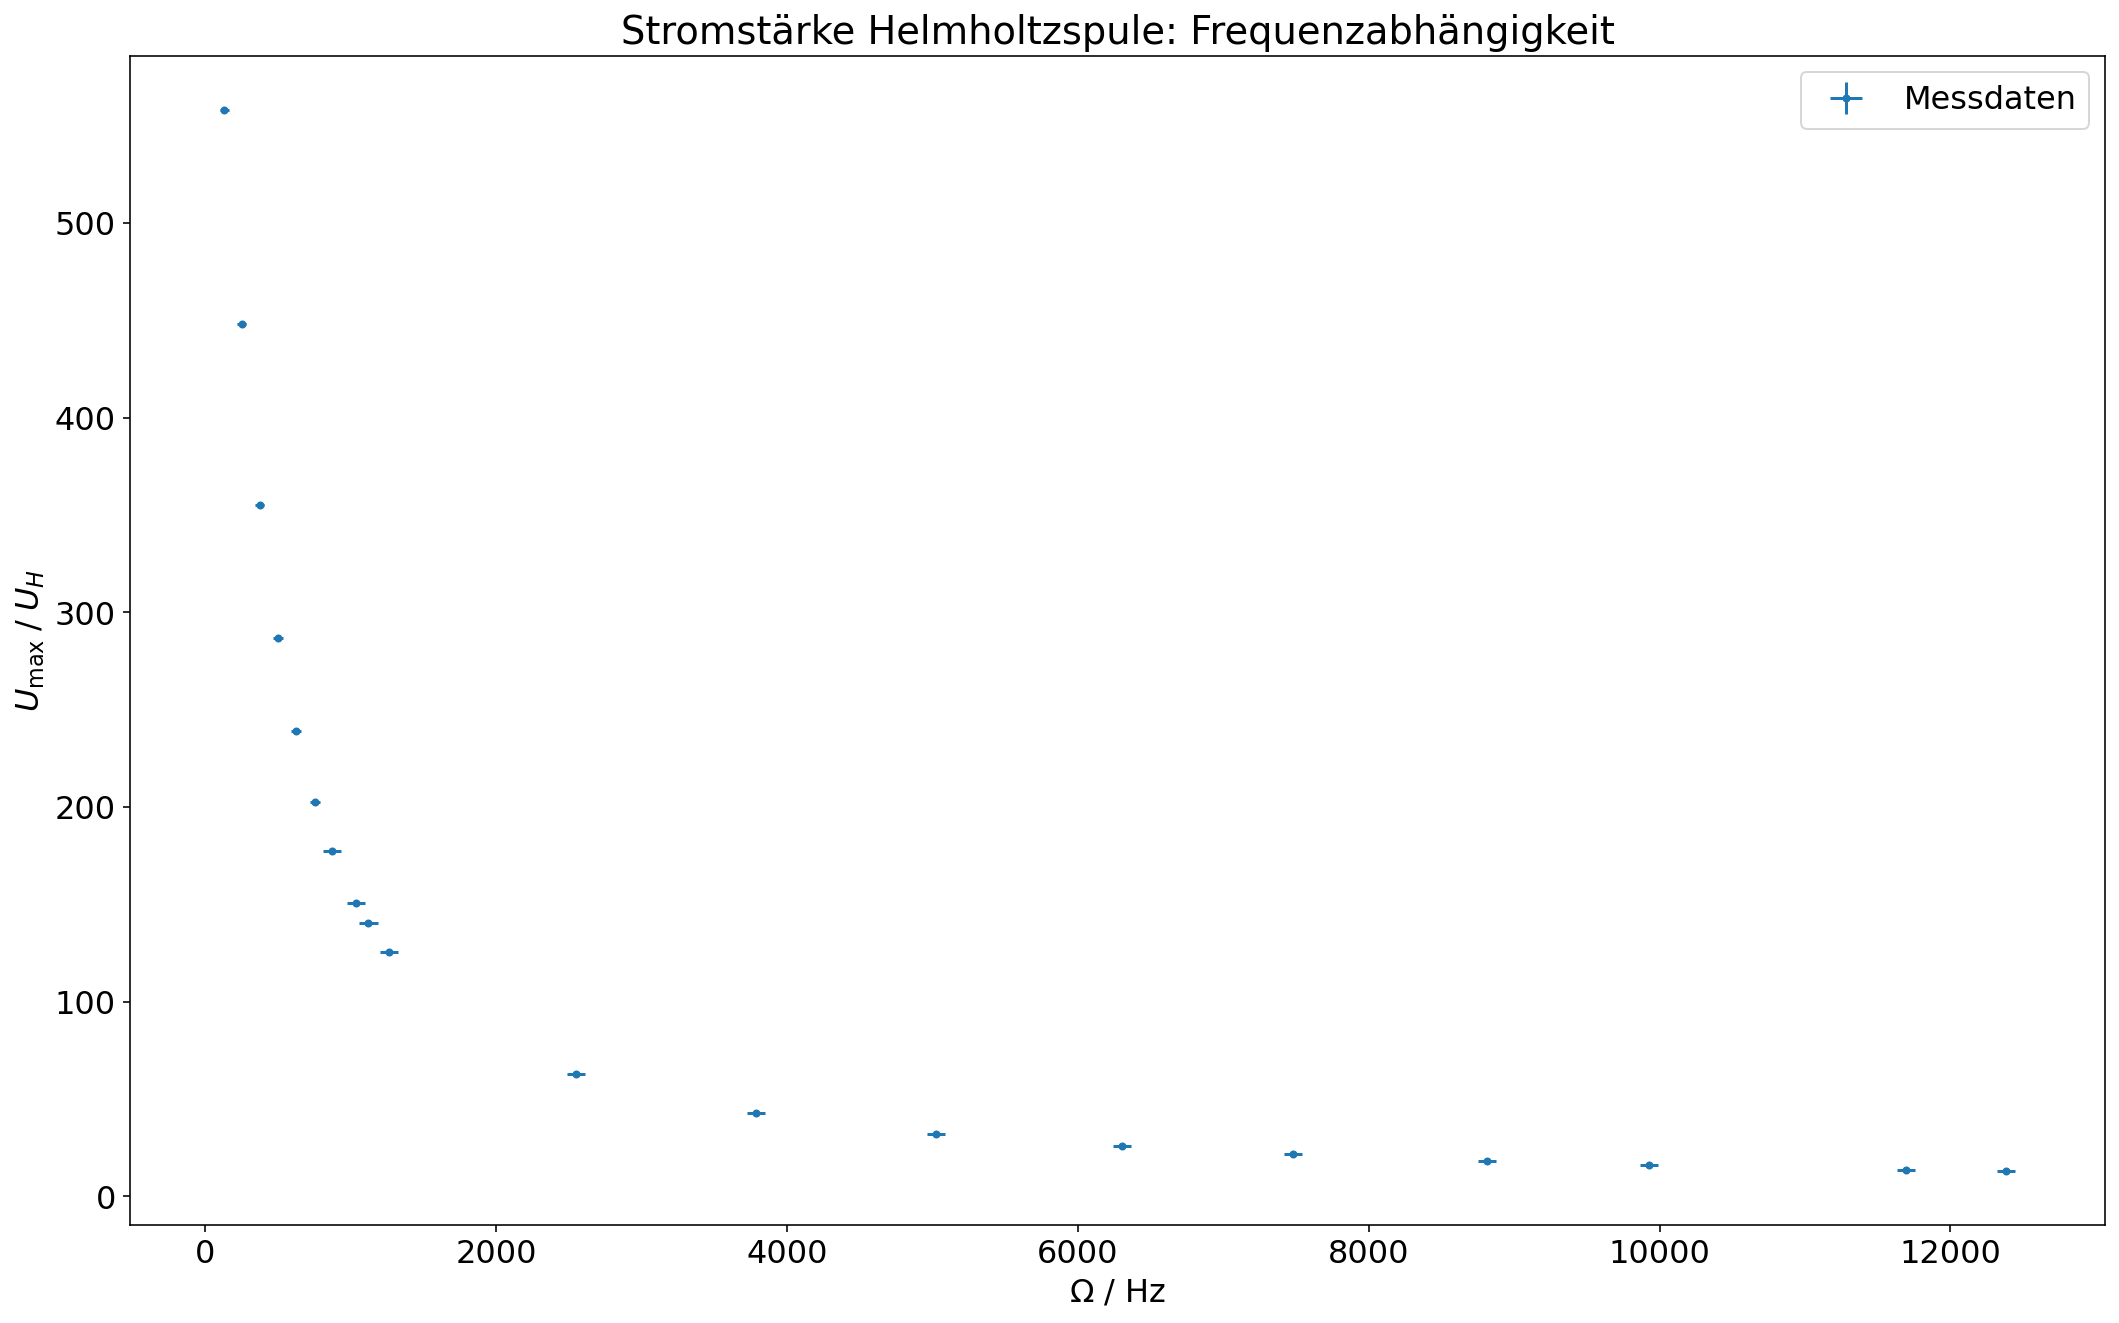

In [11]:
F, U, I = np.loadtxt('data/aufgabe2_2.txt', skiprows=1, usecols=(0,1,2), unpack=True)

ΔU = 0.02 # Vss;
U_H = 9.4 # V;
U_H_err = 0.1 # V;

Ω = 2*pi*F
Um = 0.5 * U  # V;
ΔUm = 0.5 * ΔU  # V;

I_err = np.where(I>50,0.2,0) + np.where(I<50,0.02,0)
Ω_err = 2*pi*(np.where(Ω<100,1,0) + np.where((Ω>=100) & (Ω<800),5,0) + np.where(Ω>=800,10,0))

V = Um/U_H
V_err = V * np.sqrt((ΔUm/U)**2 + (U_H_err/U_H)**2)

plt.errorbar(Ω,I, xerr=Ω_err, yerr=I_err, linestyle='none', marker='.', label='Messdaten')
plt.xlabel(r'$\Omega$ / Hz')
plt.ylabel(r'$U_{\max}\;/\;U_H$')
plt.title('Stromstärke Helmholtzspule: Frequenzabhängigkeit')
plt.legend()
plt.show()

<ipython-input-18-8ded8b5cd6de>:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(c*x**2 + d)


L: 5.841000e-02 +/- 1.100000e-04


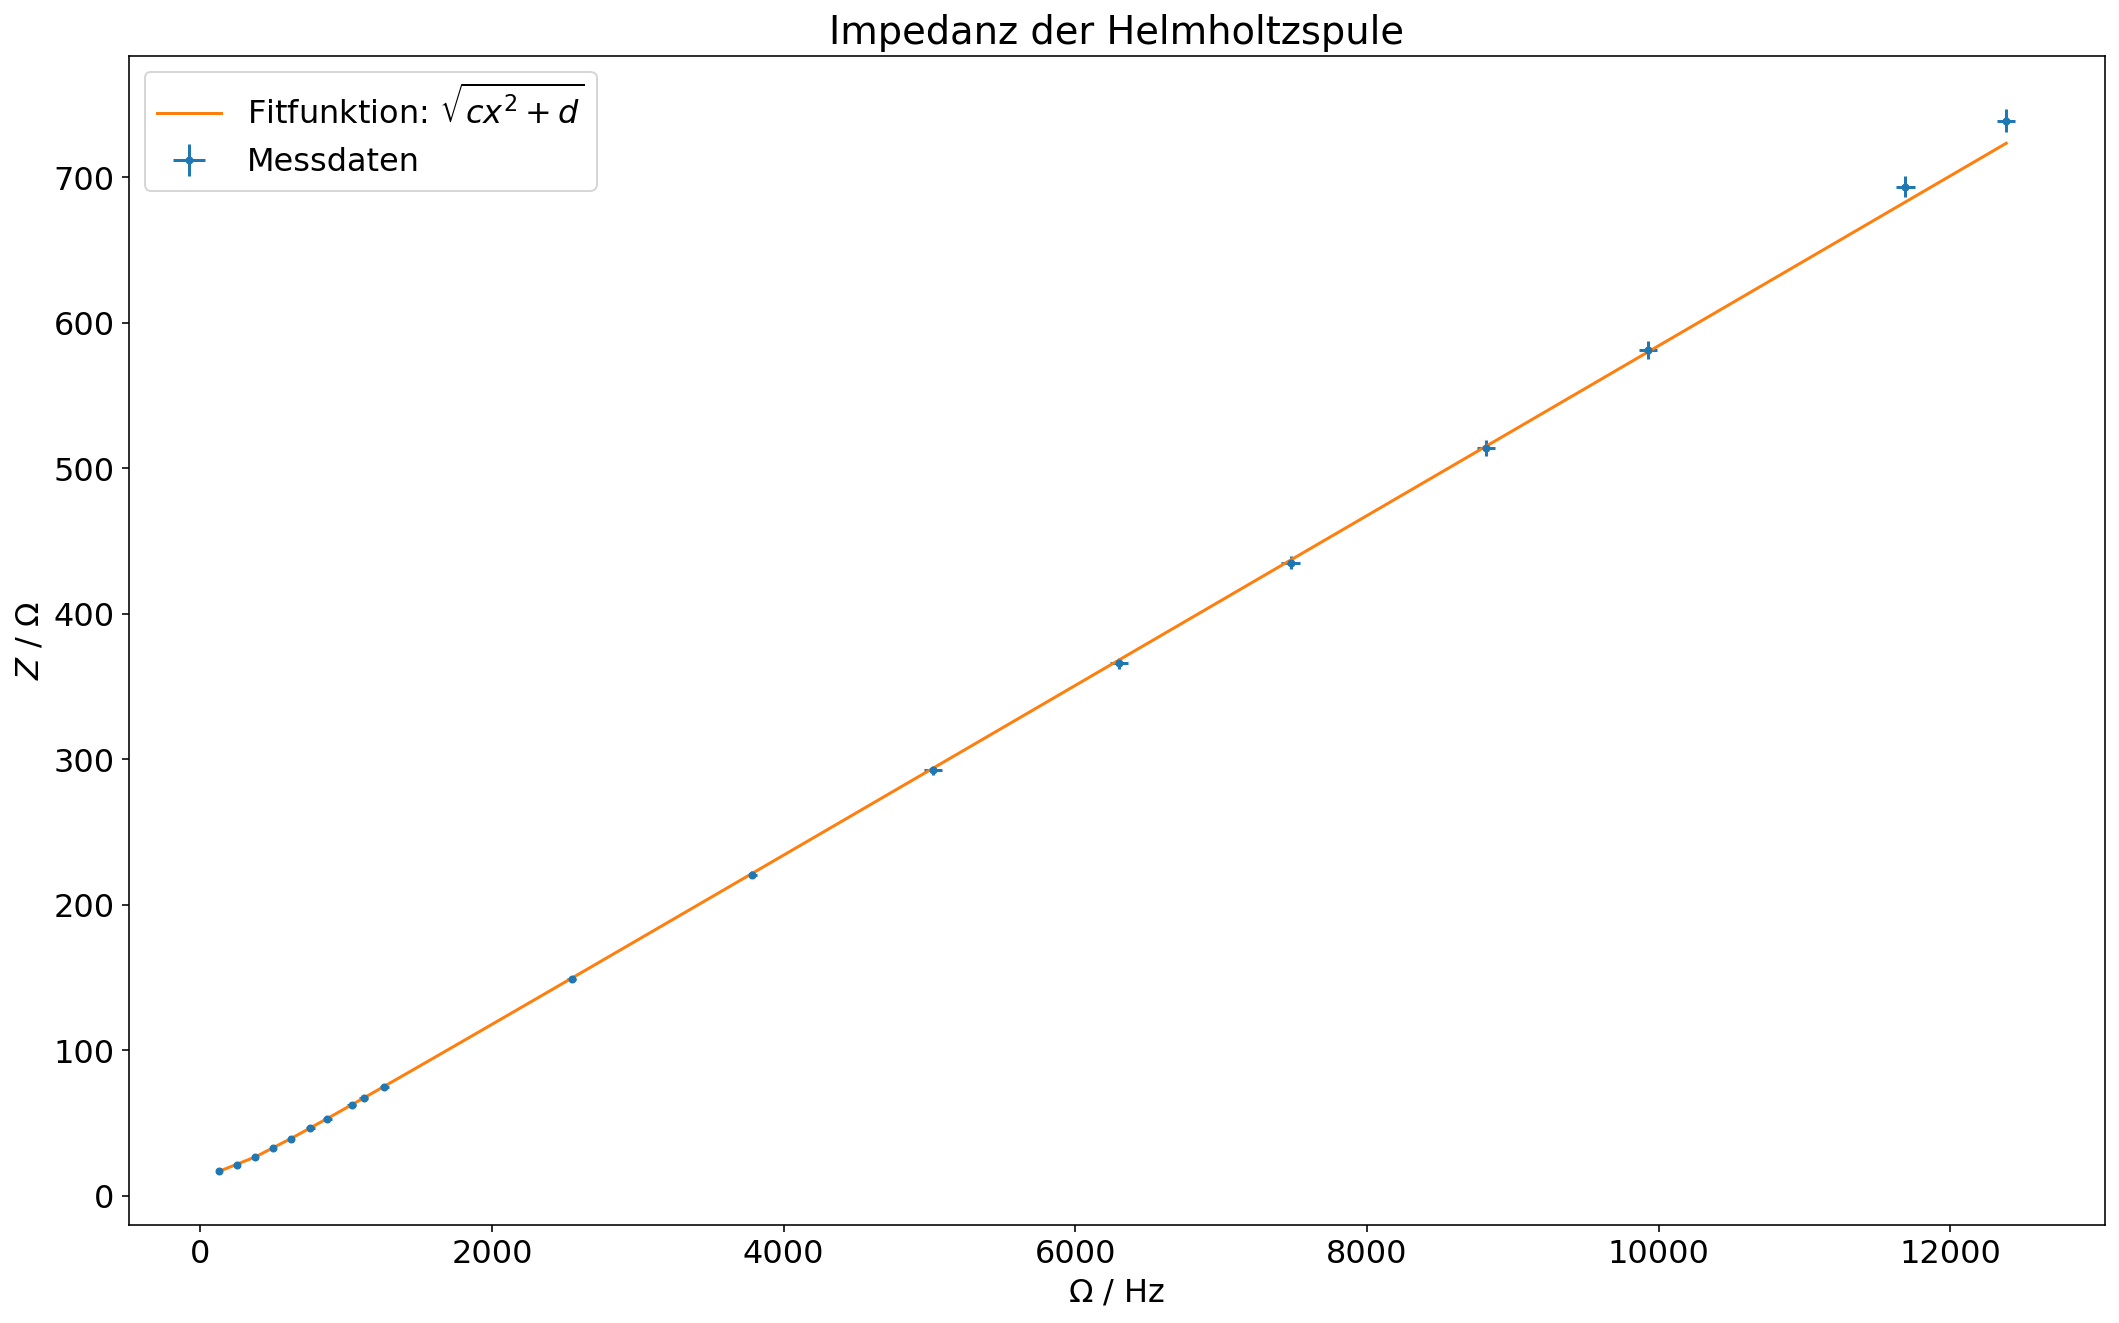

In [18]:
F, U, I = np.loadtxt('data/aufgabe2_2.txt', skiprows=1, usecols=(0,1,2), unpack=True)

ΔU = 0.02 # Vss;
U_H = 9.4 # V;
U_H_err = 0.1
ΔI = np.where(I>50,0.2,0)*1E-3 + np.where(I<50,0.02,0)*1E-3
I = I*1E-3 # A;

Ω = 2*pi*F
Um = 0.5 * U  # V;
ΔUm = 0.5 * ΔU  # V;

ΔΩ = 2*pi*(np.where(F<100,1,0) + np.where((F>=100) & (F<800),5,0) + np.where(F>=800,10,0))

def fit_function(x, c, d):
    return np.sqrt(c*x**2 + d)

Z = U_H/I
Z_err = Z * np.sqrt((ΔI / I)**2 + (U_H_err/U_H)**2)

popt, pcov = curve_fit(fit_function, Ω, Z, sigma = Z_err, maxfev=50000)
c = popt[0]
c_err = np.sqrt(pcov[0][0])
L = np.sqrt(c)
L_err = L * 1/2 * c_err/c 

print(f"L: {round(L,sf(L_err)):e} +/- {round(L_err,sf(L_err)):e}")

x = np.linspace(np.min(Ω),np.max(Ω))


plt.errorbar(Ω,Z, xerr=ΔΩ, yerr=Z_err, linestyle='none', marker='.', label='Messdaten')
plt.plot(x,fit_function(x,*popt),label=r'Fitfunktion: $\sqrt{cx^2+d}$')
plt.xlabel(r'$\Omega$ / Hz')
plt.ylabel(r'$Z$ / $\Omega$')
plt.title('Impedanz der Helmholtzspule')
plt.legend()
if matplotlib.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+'aufgabe2_3.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+'aufgabe2_3.pdf', format='pdf')
    plt.clf()
plt.savefig(FIGURE_PATH+'aufgabe2_3.jpg', format='jpg')
plt.show()

####  3

###### 1.)

In [13]:
U = 184E-3 # V;
ΔU = 2E-3 # V;
Um = 0.5 * U  # V;
ΔUm = 0.5 * ΔU  # V;
f = 18.3 # Hz;
Δf = 0.1
A = 41.7E-4 # m^2; Flachspulue Fläche
N = 4000 # ; Windungen Flachspule

B = Um / (2 * np.pi * A * N * f)

B_err = B * np.sqrt((ΔUm/Um)**2 + (Δf/f)**2)
B_lit = 48.714E-6
print(f"B: {round(B,sf(B_err)):e} +/- {round(B_err,sf(B_err)):e}")
print(abs(B_lit-B)/B_err)

B: 4.797000e-05 +/- 5.800000e-07
1.2765642549707974


In [14]:
I = 63.4E-3 # A; Stromstärke Helmholtzspule
ΔI = 1E-3 #A;
U = 20E-3  # Vss;
ΔU = 1E-3  # Vss;
Um = 0.5 * U  # V;
ΔUm = 0.5 * ΔU  # V;
f = 18.5 # Hz;
Δf = 1 # Hz;

Nh = 124 # ; Windungen Helmholtzspule
R = (295/2)*1E-3 # m; Helmholtzspule Radius
Ns = 4000 # ; Windungen Flachspule
A = 41.7E-4 # m^2; Flachspulue Fläche

### Vertikalkomponente
B_V = (4/5)**(3/2) * mu_0 * I * Nh / R # T; Erdmagnetfeld Vertikalkomponente
B_V_err = B_V * ΔI/I
print(f"B_V: {round(B_V,sf(B_V_err)):e} +/- {round(B_V_err,sf(B_V_err)):e}")

### Horizontalkomponente
B_H = Um / (2 * pi * A * Ns * f) # T; Erdmagnetfeld Horizontalkomponente

B_H_err = B_H * np.sqrt((ΔUm/Um)**2 + (Δf/f)**2)
print(f"B_H: {round(B_H,sf(B_H_err)):e} +/- {round(B_H_err,sf(B_H_err)):e}")

B_V: 4.793000e-05 +/- 7.600000e-07
B_H: 5.160000e-06 +/- 3.800000e-07


In [15]:
# B_V ~ B_H
inklination = (np.arctan(B_V/B_H))*180/np.pi
inklination_err = (1 / (1 + (B_V / B_H)**2) * np.sqrt(((1 / B_H) * B_V_err)**2
                                                      + (((B_V / B_H**2) * B_H_err)**2)))*180/pi
α1, α1_err = inklination, inklination_err

print(f"inklination: {round(inklination,sf(inklination_err)):e} +/- {round(inklination_err,sf(inklination_err)):e}")

# B_V ~ B
inklination = (np.arcsin(B_V/B))*180/np.pi

inklination_err = (1 / np.sqrt(((B_V / B)**2 + 1)) * np.sqrt(((1 / B) * B_V_err)**2
                                                      + (((B_V / B**2) * B_err)**2)))*180/pi
α2, α2_err = inklination, inklination_err

print(f"inklination: {round(inklination,sf(inklination_err)):e} +/- {round(inklination_err,sf(inklination_err)):e}")

# B_H ~ B
inklination = (np.arccos(B_H/B))*180/np.pi

inklination_err = (1 / np.sqrt(((B_H / B)**2 + 1)) * np.sqrt(((1 / B) * B_H_err)**2
                                                      + (((B_H / B**2) * B_err)**2)))*180/pi
α3, α3_err = inklination, inklination_err

print(f"inklination: {round(inklination,sf(inklination_err)):e} +/- {round(inklination_err,sf(inklination_err)):e}")

inklination: 8.386000e+01 +/- 4.600000e-01
inklination: 8.755000e+01 +/- 8.100000e-01
inklination: 8.383000e+01 +/- 4.600000e-01


In [16]:
alpha = np.mean([α1,α2,α3])
alpha_err = alpha * np.sqrt((α1_err/α1)**2 + (α2_err/α2)**2 + (α3_err/α3)**2) / 3
print(f"alpha: {round(alpha,sf(alpha_err)):e} +/- {round(alpha_err,sf(alpha_err)):e}")

alpha: 8.508000e+01 +/- 3.400000e-01


In [17]:
# 49-25, 8-40, 114 m.ü NN August 2020
inklination_lit = 65.18

 	Ort: 	-
	Datum: 	August 2020
	Höhe ü.NN: 	114 m
	Geographische Breite: 	49° 25'
	Geographische Länge: 	8° 40'
 
	Komponente 	Wert 	Säkularvariation
	Deklination* 	2° 55' 	10.4 arcmin/year
	Totalintensität 	48714.7 nT 	52.2 nT/year
	Inklination 	65° 11' 	1.0 arcmin/year
	Horizontalintensität 	20442.9 nT 	9.3 nT/year
	Nord-Komponente 	20416.4 nT 	6.0 nT/year
	Ost-Komponente 	1041.0 nT 	62.6 nT/year
	Vertikal Komponente 	44217.7 nT 	53.2 nT/year